#### Author: Shruti Gupta
#### File Name: An Attempt of Data Cleaning & Exploratory Analysis
#### Date: 15/05/2019
#### Verison: 1

### Dataset: Lending Club data

Years of data to download: 2007-2011

The data contains 42538 rows and 145 columns. Trying to see where or not the inserest rate field gets affected by the other fields.

#### Importing the libraries that are required

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Loading Data

In [3]:
loans = pd.read_csv('../input/LoanStats3a.csv', low_memory = False, header = 1,skiprows=0)

#### Checking of loans info

In [4]:
loans.shape

(42538, 145)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [6]:
loans.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,n,NaN,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,

In this stage checked about the data information and whether or not the data loading happened properly.

#### Checking of Fields
seeing which fields are na and cleaning/dropping them accordingly

In [7]:
loans.isna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
2,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
5,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
6,True,True,False,False,False,False,False

In [9]:
drop_cols=['id','member_id','url','annual_inc_joint','dti_joint','verification_status_joint','tot_cur_bal','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m',
           'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl',
           'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
           'revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type','hardship_reason',
          'hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','hardship_flag','disbursement_method']

In [10]:
loans=loans.drop(drop_cols,axis=1)

In [11]:
loans=loans.drop([42536,42537],axis=0)

In [12]:
loans.shape

(42536, 63)

In [13]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankru

The reason to drop 82 columns and 2 rows was due there being no useful data or it being completely empty as seen when checking for null values. While there are still some null values in the columns that are not deleted it can be still be used as there is values on which data caluclation can occur.

#### Cleaning the values in various fields.

converting string data to numeric once removing any possible string data

In [14]:
loans['int_rate']

0         10.65%
1         15.27%
2         15.96%
3         13.49%
4         12.69%
5          7.90%
6         15.96%
7         18.64%
8         21.28%
9         12.69%
10        14.65%
11        12.69%
12        13.49%
13         9.91%
14        10.65%
15        16.29%
16        15.27%
17         6.03%
18        11.71%
19         6.03%
20        15.27%
21        12.42%
22        11.71%
23        11.71%
24        11.71%
25         9.91%
26        14.27%
27        16.77%
28        11.71%
29        11.71%
          ...   
42506     13.12%
42507     12.80%
42508     13.12%
42509     13.12%
42510      9.64%
42511     14.70%
42512      7.12%
42513     10.59%
42514      9.64%
42515      9.01%
42516     11.22%
42517     10.91%
42518     14.07%
42519      7.75%
42520      7.43%
42521      7.43%
42522      8.38%
42523      7.12%
42524     12.49%
42525     11.22%
42526     11.22%
42527      9.01%
42528      9.33%
42529      9.96%
42530      9.64%
42531     10.28%
42532      9.64%
42533      9.3

In [15]:
#removing % sign using regex and str.extract
loans['int_rate']=loans['int_rate'].str.extract('(\d*\.\d+|\d+)', expand = False)

In [16]:
#converting to float
loans['int_rate']=loans.int_rate.astype(float)

In [17]:
loans.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
         ...  
42506    13.12
42507    12.80
42508    13.12
42509    13.12
42510     9.64
42511    14.70
42512     7.12
42513    10.59
42514     9.64
42515     9.01
42516    11.22
42517    10.91
42518    14.07
42519     7.75
42520     7.43
42521     7.43
42522     8.38
42523     7.12
42524    12.49
42525    11.22
42526    11.22
42527     9.01
42528     9.33
42529     9.96
42530     9.64
42531    10.28
42532     9.64
42533     9.33
42534     8.38
42535     7.75
Name: int_rate, Length: 42536, dtype: float64

In [18]:
loans.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
5         36 months
6         60 months
7         36 months
8         60 months
9         60 months
10        60 months
11        36 months
12        36 months
13        36 months
14        36 months
15        36 months
16        36 months
17        36 months
18        36 months
19        36 months
20        60 months
21        36 months
22        36 months
23        36 months
24        36 months
25        36 months
26        36 months
27        60 months
28        36 months
29        36 months
            ...    
42506     36 months
42507     36 months
42508     36 months
42509     36 months
42510     36 months
42511     36 months
42512     36 months
42513     36 months
42514     36 months
42515     36 months
42516     36 months
42517     36 months
42518     36 months
42519     36 months
42520     36 months
42521     36 months
42522     36 months
42523     36 months
42524     36 months


In [19]:
#removing months and converting to numeric
loans.term=loans['term'].str.extract('(\d+)', expand = False)
loans['term']=loans.term.apply(pd.to_numeric)

In [20]:
loans.term

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
5        36.0
6        60.0
7        36.0
8        60.0
9        60.0
10       60.0
11       36.0
12       36.0
13       36.0
14       36.0
15       36.0
16       36.0
17       36.0
18       36.0
19       36.0
20       60.0
21       36.0
22       36.0
23       36.0
24       36.0
25       36.0
26       36.0
27       60.0
28       36.0
29       36.0
         ... 
42506    36.0
42507    36.0
42508    36.0
42509    36.0
42510    36.0
42511    36.0
42512    36.0
42513    36.0
42514    36.0
42515    36.0
42516    36.0
42517    36.0
42518    36.0
42519    36.0
42520    36.0
42521    36.0
42522    36.0
42523    36.0
42524    36.0
42525    36.0
42526    36.0
42527    36.0
42528    36.0
42529    36.0
42530    36.0
42531    36.0
42532    36.0
42533    36.0
42534    36.0
42535    36.0
Name: term, Length: 42536, dtype: float64

In [21]:
loans['term']=loans.term.dropna()

In [22]:
loans.term

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
5        36.0
6        60.0
7        36.0
8        60.0
9        60.0
10       60.0
11       36.0
12       36.0
13       36.0
14       36.0
15       36.0
16       36.0
17       36.0
18       36.0
19       36.0
20       60.0
21       36.0
22       36.0
23       36.0
24       36.0
25       36.0
26       36.0
27       60.0
28       36.0
29       36.0
         ... 
42506    36.0
42507    36.0
42508    36.0
42509    36.0
42510    36.0
42511    36.0
42512    36.0
42513    36.0
42514    36.0
42515    36.0
42516    36.0
42517    36.0
42518    36.0
42519    36.0
42520    36.0
42521    36.0
42522    36.0
42523    36.0
42524    36.0
42525    36.0
42526    36.0
42527    36.0
42528    36.0
42529    36.0
42530    36.0
42531    36.0
42532    36.0
42533    36.0
42534    36.0
42535    36.0
Name: term, Length: 42536, dtype: float64

#### Important Information

Identifying the important fields from the data that can be usefull

In [23]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankru

In [24]:
loans.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-2015,171.62,NaN,Jan-2018,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.90,1.1100,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,0.0000,Jan-2017,67.30,NaN,Jan-2017,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-2015,161.03,NaN,Feb-2017,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
6,7000.0,7000.0,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,Fully Paid,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6%,11.0,f,0.0,0.0,10137.840008,10137.84,7000.00,3137.84,0.00,0.00,0.0000,May-2016,1313.76,NaN,Sep-2016,0.0,NaN,1.0,Individual,0.0,NaN,0.0,0.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
7,3000.0,3000.0,3000.0,36.0,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,822

##### using of the method describe to help in understanding which of the remaining columns are usefull

In [25]:
loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,42506.000000,0.0,42390.0,42506.000000,41170.000000,42430.000000,158.000000,158.000000,158.000000
mean,11089.722581,10821.585753,10139.830603,42.207218,12.165016,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12019.464403,11312.193888,9675.675936,2239.981444,1.516890,102.290227,14.257300,2613.245652,0.0,NaN,1.0,0.000094,NaN,0.0,0.143039,0.045227,0.000024,4281.076456,49.841266,1.050633
std,7410.938391,7146.914675,7131.686447,10.509342,3.707936,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.366022,9038.367900,7105.750304,2585.057393,7.830064,731.157839,161.499794,4385.066535,0.0,NaN,0.0,0.009700,NaN,0.0,29.359579,0.208737,0.004855,3133.061622,15.631497,3.682974
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,0.000000,NaN,0.0,0.000000,0.000000,0.000000,193.290000,10.690000,0.000000
25%,5200.000000,5000.000000,4950.000000,36.000000,9.630000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.0,0.0,5464.404074,4792.870000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.050000,0.0,NaN,1.0,0.000000,NaN,0.0,0.000000,0.000000,0.000000,1814.250000,40.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,36.000000,11.990000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,85.000000,9.000000,0.000000,8.821000e+03,20.000000,0.0,0.0,9682.251696,8955.870000,8000.000000,1339.160000,0.000000,0.000000,0.000000,528.360000,0.0,NaN,1.0,0.000000,NaN,0.0,0.000000,0.000000,0.000000,3499.350000,49.970000,0.000000
75%,15000.000000,15000.000000,14000.000000,60.000000,14.720000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,101.000000,12.000000,0.000000,1.725100e+04,29.000000,0.0,0.0,16425.702250,15540.255000,13499.995000,2803.090000,0.000000,0.000000,0.000000,3170.220000,0.0,NaN,1.0,0.000000,NaN,0.0,0.000000,0.000000,0.000000,5733.700000,60.677500,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,129.000000,47.000000,5.000000,1.207359e+06,90.000000,0.0,0.0,58886.473429,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,7002.190000,36115.200000,0.0,NaN,1.0,1.000000,NaN,0.0,6053.000000,2.000000,1.000000,14798.200000,92.740000,24.000000


The values that appears shows that columns like loan_amnt,funded_amnt,funded_amnt_inv,term,int_rateminstallment,dti,
settlement_amount, settlement_percentage can be used to do calcluation and visualisation while others are not as as useful as no main calcuation can happen on it.

#### Visualization of the important fields/information

##### Data and Graph Number: 1

##### 1(a)

In [26]:
funds_invested=loans.groupby(['funded_amnt','int_rate']).funded_amnt_inv.mean()
funds_invested

funded_amnt  int_rate
500.0        8.00          500.000000
             8.07          400.000000
             8.32          500.000000
             8.38          375.000000
             9.01          125.000000
             9.76          450.000000
             10.46         500.000000
             10.71         500.000000
             11.41         475.000000
             12.49         200.000000
             12.99         475.000000
550.0        12.04         525.000000
600.0        10.91         575.000000
             11.54         225.000000
             13.24         541.720000
             14.07         475.930000
             17.66         475.000000
700.0        11.86         575.004772
             12.29         700.000000
             17.09         675.000000
725.0        7.37          650.000000
750.0        12.29         725.000000
800.0        7.37          800.000000
             9.96          750.000000
             13.43         600.000000
850.0        14.07         2

Text(0.5, 0.98, 'The Mean of the Funded Amount Invested against Funded Amount & Int Rate')

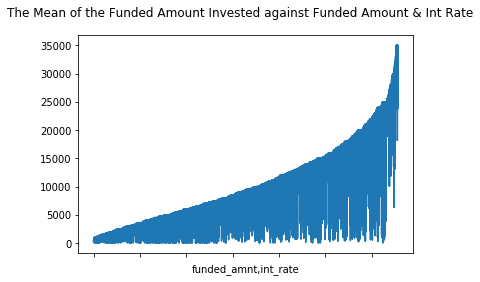

In [29]:
funds_invested.plot()
plt.suptitle('The Mean of the Funded Amount Invested against Funded Amount & Int Rate')

##### 1(b)

In [28]:
funds_invested2=loans.groupby(['funded_amnt','funded_amnt_inv']).int_rate.mean()
funds_invested2

funded_amnt  funded_amnt_inv
500.0        125.000000          9.010000
             200.000000         12.490000
             375.000000          8.380000
             400.000000          8.070000
             450.000000          9.760000
             475.000000         12.200000
             500.000000          9.372500
550.0        525.000000         12.040000
600.0        225.000000         11.540000
             475.000000         17.660000
             475.930000         14.070000
             525.000000         13.240000
             558.440000         13.240000
             575.000000         10.910000
700.0        575.004772         11.860000
             675.000000         17.090000
             700.000000         12.290000
725.0        650.000000          7.370000
750.0        725.000000         12.290000
800.0        600.000000         13.430000
             750.000000          9.960000
             800.000000          7.370000
850.0        200.000000         14.070000
900.0

Text(0.5, 0.98, 'The Mean of the Interest Rate against Funded Amount & Investment')

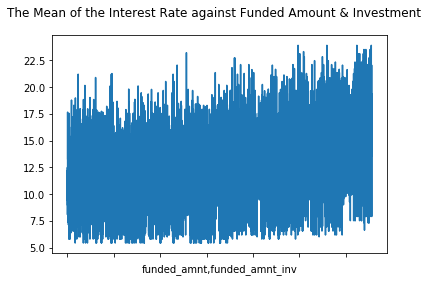

In [30]:
funds_invested2.plot()
plt.suptitle('The Mean of the Interest Rate against Funded Amount & Investment')

##### Data and Graph Number: 2

###### 2(a)

In [35]:
loans[loans['int_rate'] != 6.03].installment

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
5        156.46
6        170.08
7        109.43
8        152.39
9        121.45
10       153.45
11       402.54
12       305.38
13        96.68
14       325.74
15        35.31
16       347.98
18       198.46
20       484.63
21       701.73
22       330.76
23       330.76
24       198.46
25       483.38
26       514.64
27       123.65
28       132.31
29       281.15
30       136.11
31       995.82
          ...  
42506    226.98
42507     67.20
42508    202.51
42509    180.57
42510     61.00
42511    345.18
42512     61.87
42513    195.28
42514    141.25
42515     38.17
42516    164.23
42517     45.78
42518     34.21
42519    156.11
42520     77.69
42521     93.23
42522     81.94
42523     30.94
42524     42.65
42525    211.85
42526    344.87
42527     95.42
42528     95.86
42529     64.50
42530    208.66
42531    113.39
42532     32.11
42533     80.69
42534    204.84
42535    156.11
Name: installment, Lengt

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

Text(0.5, 0.98, 'Hstogram of Intallments bases of Interest Rate !=6.03')

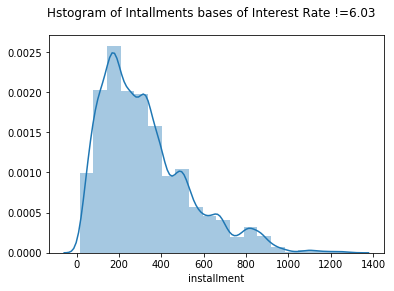

In [36]:
sns.distplot(loans[loans['int_rate'] != 6.03].installment, bins = 20)
plt.suptitle('Hstogram of Intallments bases of Interest Rate !=6.03')

###### 2(b)

In [37]:
loans[loans['int_rate'] != 16.77].installment

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
5        156.46
6        170.08
7        109.43
8        152.39
9        121.45
10       153.45
11       402.54
12       305.38
13        96.68
14       325.74
15        35.31
16       347.98
17       109.57
18       198.46
19       280.01
20       484.63
21       701.73
22       330.76
23       330.76
24       198.46
25       483.38
26       514.64
28       132.31
29       281.15
30       136.11
          ...  
42506    226.98
42507     67.20
42508    202.51
42509    180.57
42510     61.00
42511    345.18
42512     61.87
42513    195.28
42514    141.25
42515     38.17
42516    164.23
42517     45.78
42518     34.21
42519    156.11
42520     77.69
42521     93.23
42522     81.94
42523     30.94
42524     42.65
42525    211.85
42526    344.87
42527     95.42
42528     95.86
42529     64.50
42530    208.66
42531    113.39
42532     32.11
42533     80.69
42534    204.84
42535    156.11
Name: installment, Lengt

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

Text(0.5, 0.98, 'Hstogram of Installments bases of Interest Rate !=16.77')

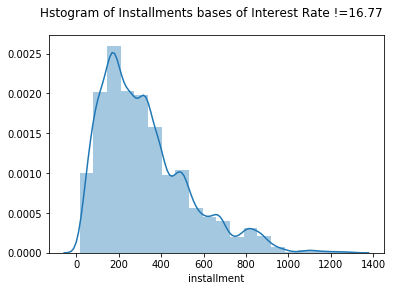

In [38]:
sns.distplot(loans[loans['int_rate'] != 16.77].installment, bins = 20)
plt.suptitle('Hstogram of Installments bases of Interest Rate !=16.77')

##### Data and Graph Number: 3

In [39]:
loans[['loan_amnt','installment']]

,loan_amnt,installment
0,5000.0,162.87
1,2500.0,59.83
2,2400.0,84.33
3,10000.0,339.31
4,3000.0,67.79
5,5000.0,156.46
6,7000.0,170.08
7,3000.0,109.43
8,5600.0,152.39
9,5375.0,121.45


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'The JointGrid for Installment and Loan Amount')

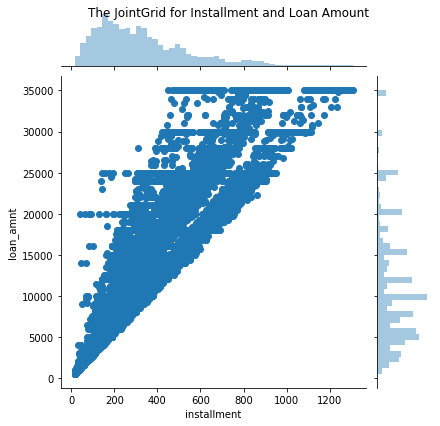

In [40]:
sns.jointplot(x='installment', y='loan_amnt', data=loans)
plt.suptitle('The JointGrid for Installment and Loan Amount')

##### Data and Graph Number: 4

In [41]:
loan_grades= loans.grade.value_counts()
loan_grades

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

Text(0.5, 0.98, 'The Grade Type of Loans')

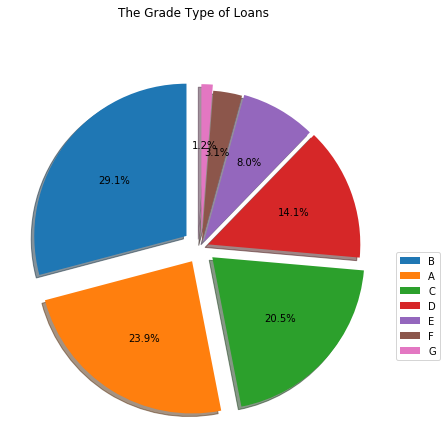

In [42]:
fig, ax = plt.subplots(figsize=(8,7))
explode = (0.12,0.11,0.10,0.05,0.04,0.03,0.07)
ax.pie(loan_grades, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=loan_grades.index)
plt.suptitle('The Grade Type of Loans')

##### Data and Graph Number: 5

In [43]:
loans.groupby(['settlement_status','int_rate'],as_index=False).settlement_amount.sum()

,settlement_status,int_rate,settlement_amount
0,ACTIVE,14.65,4248.84
1,ACTIVE,16.77,694.48
2,ACTIVE,16.82,6323.00
3,ACTIVE,20.03,14798.20
4,ACTIVE,20.77,5589.00
5,BROKEN,6.91,1870.00
6,BROKEN,7.51,1500.00
7,BROKEN,10.59,500.00
8,BROKEN,11.49,1259.55
9,BROKEN,12.42,9000.00


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'the Status of The Settlement Amount')

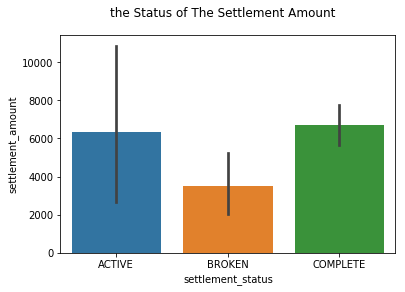

In [44]:
settlement_pay=loans.groupby(['settlement_status','int_rate'],as_index=False).settlement_amount.sum()
sns.barplot(x = 'settlement_status', y = 'settlement_amount',data = settlement_pay)
plt.suptitle('the Status of The Settlement Amount')

##### Data and Graph Number:  6

In [45]:
loans.groupby('settlement_amount').settlement_percentage.sum().nlargest(20)

settlement_amount
8000.00     179.37
1800.00     153.90
6500.00     151.52
5000.00     136.18
1200.00     124.60
12000.00    122.41
3300.00     115.48
2100.00     106.90
1600.00     103.86
3000.00      94.75
4390.00      92.74
2500.00      91.92
10021.06     91.70
4000.00      91.52
1912.00      90.02
12390.99     87.25
1000.00      87.03
5920.62      86.41
7000.00      85.05
6123.85      80.00
Name: settlement_percentage, dtype: float64

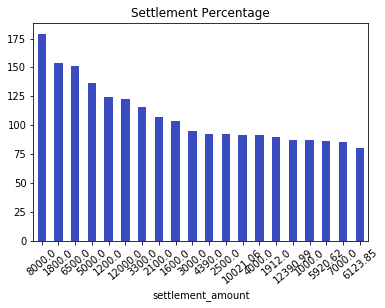

In [46]:
loans.groupby('settlement_amount').settlement_percentage.sum().nlargest(20)\
.plot(kind = 'bar',title = 'Settlement Percentage', rot = 40, colormap = 'coolwarm')

##### Data and Graph Number: 7

In [47]:
cols=loans[['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment','dti','settlement_amount','settlement_percentage','settlement_term']]
loans2=pd.DataFrame(cols)

Text(0.5, 0.98, 'HeatMap showing Correlation between Informative Fields')

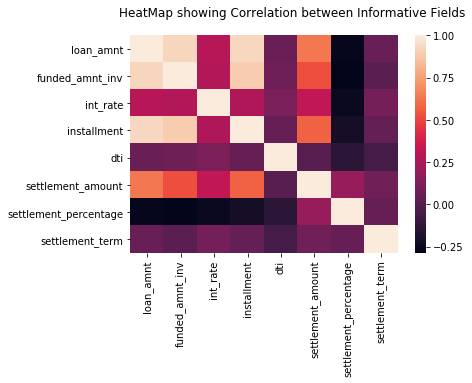

In [48]:
sns.heatmap(loans2.corr());
plt.suptitle('HeatMap showing Correlation between Informative Fields')